In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
import sklearn.metrics as mt

In [2]:
data = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/datasets/Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.drop(columns=["No", "X1 transaction date", "X5 latitude", "X6 longitude"], axis=1, inplace=True)

In [6]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


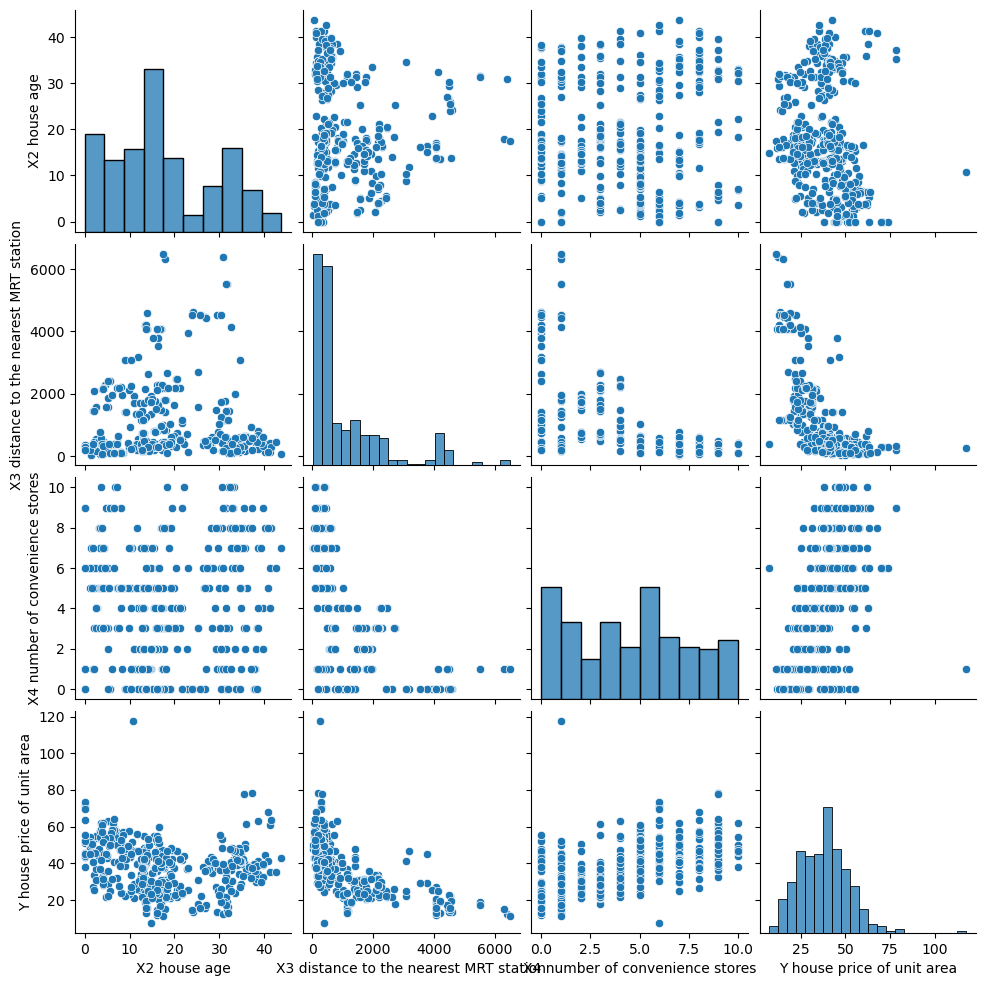

In [7]:
sns.pairplot(df)

In [8]:
y = df[["Y house price of unit area"]]
X = df.drop("Y house price of unit area", axis=1)

In [9]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(scaled_data, columns=X.columns)

In [10]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [11]:
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,0.831373,-0.349673,1.2
1,0.177778,-0.159351,1.0
2,-0.146405,0.059876,0.2
3,-0.146405,0.059876,0.2
4,-0.580392,-0.087268,0.2


In [12]:
pol2 = PolynomialFeatures(degree=2)
X_pol2 = pol2.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_pol2, y, test_size=0.2, random_state=42)

In [14]:
pol_reg2 = LinearRegression().fit(X_train, y_train)
predict2 = pol_reg2.predict(X_test)

In [15]:
r2 = mt.r2_score(y_test, predict2)
mse = mt.mean_squared_error(y_test, predict2)
print(f"Pol Reg Deg2 R2= {r2}\nPol Reg2 Deg MSE={mse}")

Pol Reg Deg2 R2= 0.7147044026998445
Pol Reg2 Deg MSE=47.861116515826126


In [16]:
pol3 = PolynomialFeatures(degree=3)
X_pol3 = pol3.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol3, y, test_size=0.2, random_state=42)

pol_reg3 = LinearRegression().fit(X_train, y_train)
predict3 = pol_reg3.predict(X_test)

r2 = mt.r2_score(y_test, predict3)
mse = mt.mean_squared_error(y_test, predict3)
print(f"Pol Reg Deg3 R2= {r2}\nPol Reg Deg3 MSE={mse}")

Pol Reg Deg3 R2= 0.7273210856138106
Pol Reg Deg3 MSE=45.744545013486174


In [17]:
pol4 = PolynomialFeatures(degree=4)
X_pol4 = pol4.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol4, y, test_size=0.2, random_state=42)

pol_reg4 = LinearRegression().fit(X_train, y_train)
predict4 = pol_reg4.predict(X_test)

r2 = mt.r2_score(y_test, predict4)
mse = mt.mean_squared_error(y_test, predict4)
print(f"Pol Reg Deg4 R2= {r2}\nPol Reg Deg4 MSE={mse}")

Pol Reg Deg4 R2= 0.365312519625156
Pol Reg Deg4 MSE=106.47500955788483
